In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

neighborhood_df = pd.read_csv('red_neighborhood_Baltimore_data.csv')
baltimore_df = pd.read_csv('redfin_Baltimore_zip_data.csv')

print(neighborhood_df.columns)
print(baltimore_df.columns)

Index(['Unnamed: 0', 'period_begin', 'period_end', 'period_duration',
       'region_type', 'region_type_id', 'table_id', 'is_seasonally_adjusted',
       'region', 'Neighborhood', 'city', 'state', 'state_code',
       'property_type', 'property_type_id', 'median_sale_price',
       'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price',
       'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf',
       'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'median_dom', 'median_dom_mom',
       'median_dom_yoy', 'avg_sale_to_list', 'avg_sale_to_list_mom',
       'avg_sale_to_list_yoy', 'sold_

In [2]:
print(neighborhood_df.head(5))
print(baltimore_df.head(5))

   Unnamed: 0 period_begin period_end  period_duration   region_type  \
0          47     4/1/2018  6/30/2018               90  neighborhood   
1          58     4/1/2020  6/30/2020               90  neighborhood   
2         239     1/1/2021  3/31/2021               90  neighborhood   
3         377    11/1/2016  1/31/2017               90  neighborhood   
4         437     6/1/2016  8/31/2016               90  neighborhood   

   region_type_id  table_id is_seasonally_adjusted         region  \
0               1      1542                      f  Baltimore, MD   
1               1    181851                      f  Baltimore, MD   
2               1      2577                      f  Baltimore, MD   
3               1    182245                      f  Baltimore, MD   
4               1      2293                      f  Baltimore, MD   

             Neighborhood  ... sold_above_list_yoy price_drops  \
0            Little Italy  ...            0.000000         NaN   
1       O'Donnell He

In [3]:
neighborhood_df.describe(include='all')
baltimore_df.describe(include='all')

,Unnamed: 0,period_begin,period_end,zip,state,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,...,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,year
count,56115.000000,56115,56115,56115.000000,56115,56115,56115.000000,5.611500e+04,54839.000000,52977.000000,...,56034.000000,54761.000000,52904.000000,56115.000000,54839.000000,52977.000000,48032.000000,44484.000000,43864.000000,56115.000000
unique,NaN,120,120,NaN,1,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,11/1/2021,1/31/2022,NaN,Maryland,All Residential,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,492,492,NaN,56115,17300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28057.000000,NaN,NaN,21174.904981,NaN,NaN,4.739856,3.112002e+05,0.025420,0.109084,...,0.981871,0.000383,0.005903,0.203855,0.002325,0.030484,0.404369,0.001204,0.027436,2016.565268
std,16199.149515,NaN,NaN,227.672766,NaN,NaN,4.995233,2.026022e+05,0.533598,0.779720,...,0.047990,0.028358,0.051693,0.182007,0.110761,0.195757,0.271641,0.322487,0.330350,2.866316
min,0.000000,NaN,NaN,20711.000000,NaN,NaN,-1.000000,3.000000e+03,-0.981137,-0.971989,...,0.500000,-0.815374,-1.147984,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,2012.000000
25%,14028.500000,NaN,NaN,21050.000000,NaN,NaN,-1.000000,1.899925e+05,-0.031250,-0.047120,...,0.968290,-0.004926,-0.007323,0.082316,-0.026570,-0.037594,0.230769,-0.155556,-0.133333,2014.000000
50%,28057.000000,NaN,NaN,21152.000000,NaN,NaN,6.000000,2.775000e+05,0.000000,0.043717,...,0.982906,0.000000,0.004704,0.181818,0.000000,0.012987,0.400000,0.000000,0.000000,2017.000000
75%,42085.500000,NaN,NaN,21225.000000,NaN,NaN,6.000000,3.910445e+05,0.041307,0.148025,...,0.995954,0.005721,0.018247,0.280702,0.031484,0.102339,0.555556,0.155556,0.193856,2019.000000


Calculate and Drop Missing Data:

In [4]:
maxRows_neighborhood = neighborhood_df['period_begin'].count()
print('% Missing Data:')
print((1 - neighborhood_df.count() / maxRows_neighborhood) * 100)

#neighborhood_df.drop(['months_of_supply','months_of_supply_mom','months_of_supply_yoy','price_drops','price_drops_mom','price_drops_yoy',],
    #axis=1,
    #inplace=True)

maxRows_baltimore = baltimore_df['period_begin'].count()
print('% Missing Data')
print((1 - baltimore_df.count() / maxRows_baltimore) * 100)

% Missing Data:
Unnamed: 0                          0.000000
period_begin                        0.000000
period_end                          0.000000
period_duration                     0.000000
region_type                         0.000000
region_type_id                      0.000000
table_id                            0.000000
is_seasonally_adjusted              0.000000
region                              0.000000
Neighborhood                        0.000000
city                                0.000000
state                               0.000000
state_code                          0.000000
property_type                       0.000000
property_type_id                    0.000000
median_sale_price                   0.000000
median_sale_price_mom               5.313337
median_sale_price_yoy              12.586150
median_list_price                   7.474966
median_list_price_mom              13.123972
median_list_price_yoy              18.420385
median_ppsf                         3.1

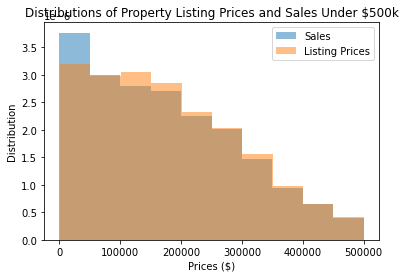

<Figure size 432x288 with 0 Axes>

In [5]:
sales_under_500k = []
for val in neighborhood_df['median_sale_price']:
    if val < 500000:
        sales_under_500k.append(val)


listings_under_500k = []
for val in neighborhood_df['median_list_price']:
    if val < 500000:
        listings_under_500k.append(val)

plt.hist(sales_under_500k, alpha=0.5, label='Sales', density=True)
plt.hist(listings_under_500k, alpha=0.5, label='Listing Prices', density=True )

plt.title('Distributions of Property Listing Prices and Sales Under $500k')
plt.legend(loc='upper right')
plt.xlabel('Prices ($)')
plt.ylabel('Distribution')
plt.show()
plt.clf()

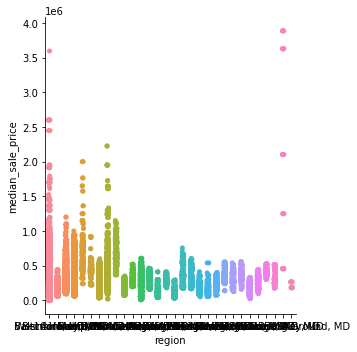

/Users/dannyliu/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


In [6]:
neighborhood_df['Baltimore_Neighborhoods'] = neighborhood_df['Neighborhood'][neighborhood_df.region == 'Baltimore, MD']
#print(neighborhood_df['Baltimore_Neighborhoods'])

sns.catplot(data=neighborhood_df, x="region", y="median_sale_price")
plt.show()
plt.clf

groupedByNeighborhood = neighborhood_df.groupby(['region', 'Neighborhood'])
#ax = groupedByNeighborhood.plot(kind = 'bar', figsize = (10,8), stacked = True)
#ax.set_xlabel('Neighborhood')
#ax.set_ylabel('Number of Properties for Sale')

